In [ ]:
import os, time, pickle, random, time
from datetime import datetime
import numpy as np
from time import localtime, strftime
import logging, scipy

import tensorflow as tf
import tensorlayer as tl
from model import SRGAN_g, SRGAN_d, Vgg19_simple_api
from utils import *
from config import config, log_config
import sys
import random

###====================== HYPER-PARAMETERS ===========================###
## Adam
batch_size = config.TRAIN.batch_size
lr_init = config.TRAIN.lr_init
beta1 = config.TRAIN.beta1
## initialize G
n_epoch_init = config.TRAIN.n_epoch_init
## adversarial learning (SRGAN)
n_epoch = config.TRAIN.n_epoch
lr_decay = config.TRAIN.lr_decay
decay_every = config.TRAIN.decay_every

ni = int(np.sqrt(batch_size))

In [ ]:
epoch = 48

checkpoint_dir = "/Users/btopiwala/Downloads/CS231N/2018/Project/gcloud-run-all-data/checkpoint_epoch_20_epoch_48_with_intermediate_checkpoint/checkpoint"

t_image = tf.placeholder('float32', [1, None, None, 1], name='input_image') # 1 for 1 channel

net_g = SRGAN_g(t_image, is_train=False, reuse=False)

###========================== RESTORE G =============================###

sess = tf.Session(config=tf.ConfigProto(allow_soft_placement=True, log_device_placement=False))
tl.layers.initialize_global_variables(sess)
tl.files.load_and_assign_npz(sess=sess, name=checkpoint_dir + '/g_srgan_{}.npz'.format(epoch), network=net_g)



In [ ]:
from builtins import range
from past.builtins import xrange

from math import sqrt, ceil
import numpy as np

import pylab as pl
import matplotlib.cm as cm
import numpy.ma as ma
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
%matplotlib inline


def nice_imshow(ax, data, vmin=None, vmax=None, cmap=None):
    """Wrapper around pl.imshow"""
    if cmap is None:
        cmap = cm.jet
    if vmin is None:
        vmin = data.min()
    if vmax is None:
        vmax = data.max()
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    im = ax.imshow(data, vmin=vmin, vmax=vmax, interpolation='nearest', cmap=cmap)
    pl.colorbar(im, cax=cax)

def make_mosaic(imgs, nrows, ncols, border=1):
    """
    Given a set of images with all the same shape, makes a
    mosaic with nrows and ncols
    """
    nimgs = imgs.shape[0]
    imshape = imgs.shape[1:]
    
    mosaic = ma.masked_all((nrows * imshape[0] + (nrows - 1) * border,
                            ncols * imshape[1] + (ncols - 1) * border),
                            dtype=np.float32)
    
    paddedh = imshape[0] + border
    paddedw = imshape[1] + border
    for i in xrange(nimgs):
        row = int(np.floor(i / ncols))
        col = i % ncols
        
        mosaic[row * paddedh:row * paddedh + imshape[0],
               col * paddedw:col * paddedw + imshape[1]] = imgs[i]
    return mosaic


def visualize_grid(Xs, ubound=255.0, padding=1):
    """
    Reshape a 4D tensor of image data to a grid for easy visualization.

    Inputs:
    - Xs: Data of shape (N, H, W, C)
    - ubound: Output grid will have values scaled to the range [0, ubound]
    - padding: The number of blank pixels between elements of the grid
    """
    (N, H, W, C) = Xs.shape
    grid_size = int(ceil(sqrt(N)))
    grid_height = H * grid_size + padding * (grid_size - 1)
    grid_width = W * grid_size + padding * (grid_size - 1)
    grid = np.zeros((grid_height, grid_width, C))
    next_idx = 0
    y0, y1 = 0, H
    for y in range(grid_size):
        x0, x1 = 0, W
        for x in range(grid_size):
            if next_idx < N:
                img = Xs[next_idx]
                low, high = np.min(img), np.max(img)
                grid[y0:y1, x0:x1] = ubound * (img - low) / (high - low)
                # grid[y0:y1, x0:x1] = Xs[next_idx]
                next_idx += 1
            x0 += W + padding
            x1 += W + padding
        y0 += H + padding
        y1 += H + padding
    # grid_max = np.max(grid)
    # grid_min = np.min(grid)
    # grid = ubound * (grid - grid_min) / (grid_max - grid_min)
    return grid


In [ ]:
def showFiltersGeneratorLayer1(epoch):

    load_params = tl.files.load_npz(path=checkpoint_dir + "/", name='g_srgan_'+ str(epoch) + '.npz')

    layer_1_weights = load_params[0]
    #print(layer_1_weights.shape)

    #(3, 3, 1, 64)

    #print(layer_1_weights.transpose(3, 0, 1, 2).shape)

    # vis_grid = (N, H, W, C)
    grid = visualize_grid(layer_1_weights.transpose(3, 0, 1, 2)) #model.params['W1'].transpose(0, 2, 3, 1))
    #plt.imshow(np.squeeze(grid.astype('uint8')), cmap='gray')
    plt.imshow(np.squeeze(grid.astype('uint8')), cmap='gray') # Working plot

    '''
    print(grid.shape)
    grid = np.dstack((grid, grid, grid))
    print("-->",grid.shape)

    plt.imshow(grid.astype('uint8'))
    '''

    plt.axis('off')
    plt.gcf().set_size_inches(25, 25)
    plt.show()
    
    
def showFiltersDiscriminatorLayer1(epoch):

    load_params = tl.files.load_npz(path=checkpoint_dir + "/", name='d_srgan_'+ str(epoch) + '.npz')

    layer_1_weights = load_params[0]

    grid = visualize_grid(layer_1_weights.transpose(3, 0, 1, 2)) #model.params['W1'].transpose(0, 2, 3, 1))
    #plt.imshow(np.squeeze(grid.astype('uint8')), cmap='gray')
    plt.imshow(np.squeeze(grid.astype('uint8')), cmap='gray') # Working plot

    plt.axis('off')
    plt.gcf().set_size_inches(25, 25)
    plt.show()    

In [ ]:
#showFiltersGeneratorLayer1(48)

#showFiltersDiscriminatorLayer1(45)

In [ ]:
#weights_n64s1_c = net_g.all_layers[0]
#print(tf.shape(weights_n64s1_c))
#tf.Print(weights_n64s1_c, [weights_n64s1_c], message="This is a: ")

load_params = tl.files.load_npz(path=checkpoint_dir + "/", name='g_srgan_48.npz')

layer_1_weights = load_params[0]
print(layer_1_weights.shape)

#(3, 3, 1, 64)

#print(layer_1_weights.transpose(3, 0, 1, 2).shape)

# vis_grid = (N, H, W, C)
grid = visualize_grid(layer_1_weights.transpose(3, 0, 1, 2)) #model.params['W1'].transpose(0, 2, 3, 1))
#plt.imshow(np.squeeze(grid.astype('uint8')), cmap='gray')
plt.imshow(np.squeeze(grid), cmap='gray') # Working plot

'''
print(grid.shape)
grid = np.dstack((grid, grid, grid))
print("-->",grid.shape)

plt.imshow(grid.astype('uint8'))
'''

plt.axis('off')
plt.gcf().set_size_inches(25, 25)
plt.show()


layer_1_weights = np.squeeze(layer_1_weights)
print("layer_1_weights squeeze shape : ", layer_1_weights.shape)

layer_1_weights = layer_1_weights.transpose(2, 0, 1)

#tl.visualize.draw_weights(layer_1_weights, saveable=True, name='weight_of_1st_layer', fig_idx=2012)


'''
pl.figure(figsize=(15, 15))
pl.suptitle('layer_1_weights')
nice_imshow(pl.gca(), make_mosaic(layer_1_weights, 8, 8), cmap=cm.binary)
'''

#tl.visualize.draw_weights(load_params[0], second=10, saveable=True, name='layer_1', fig_idx=2012)


#tl.files.npz_to_W_pdf(path=checkpoint_dir + "/", regx='g_srgan_[0-9]+\.(npz)')

#tl.files.visualize.W(weights_n64s1_c)

In [28]:
epoch = 48
load_params = tl.files.load_npz(path=checkpoint_dir + "/", name='g_srgan_'+ str(epoch) + '.npz')

# (H, W, C, #. of filters)
print(load_params.shape)
print(load_params[0].shape)
print(load_params[1].shape)


total_params = 1
for layer in range(load_params.shape[0]):
    print("-->", layer, load_params[layer].shape)

(173,)
(3, 3, 1, 64)
(64,)
('-->', 0, (3, 3, 1, 64))
('-->', 1, (64,))
('-->', 2, (3, 3, 64, 64))
('-->', 3, (64,))
('-->', 4, (64,))
('-->', 5, (64,))
('-->', 6, (64,))
('-->', 7, (3, 3, 64, 64))
('-->', 8, (64,))
('-->', 9, (64,))
('-->', 10, (64,))
('-->', 11, (64,))
('-->', 12, (3, 3, 64, 64))
('-->', 13, (64,))
('-->', 14, (64,))
('-->', 15, (64,))
('-->', 16, (64,))
('-->', 17, (3, 3, 64, 64))
('-->', 18, (64,))
('-->', 19, (64,))
('-->', 20, (64,))
('-->', 21, (64,))
('-->', 22, (3, 3, 64, 64))
('-->', 23, (64,))
('-->', 24, (64,))
('-->', 25, (64,))
('-->', 26, (64,))
('-->', 27, (3, 3, 64, 64))
('-->', 28, (64,))
('-->', 29, (64,))
('-->', 30, (64,))
('-->', 31, (64,))
('-->', 32, (3, 3, 64, 64))
('-->', 33, (64,))
('-->', 34, (64,))
('-->', 35, (64,))
('-->', 36, (64,))
('-->', 37, (3, 3, 64, 64))
('-->', 38, (64,))
('-->', 39, (64,))
('-->', 40, (64,))
('-->', 41, (64,))
('-->', 42, (3, 3, 64, 64))
('-->', 43, (64,))
('-->', 44, (64,))
('-->', 45, (64,))
('-->', 46, (64,))
(

(3, 3, 64, 64)


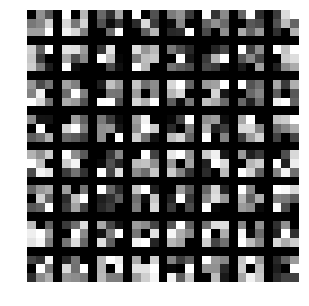

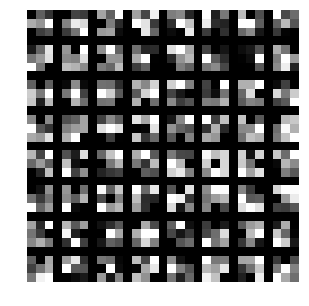

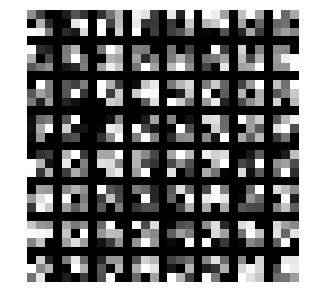

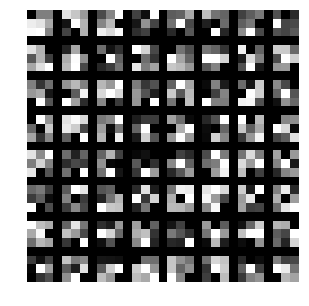

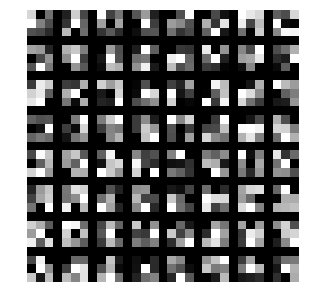

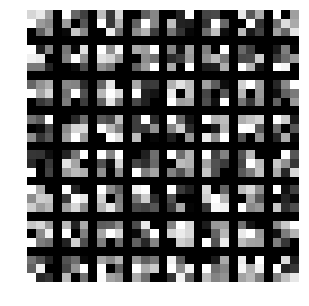

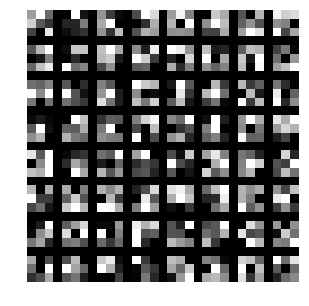

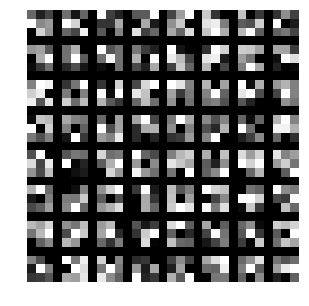

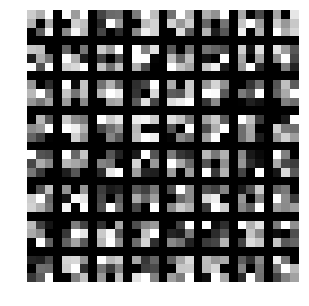

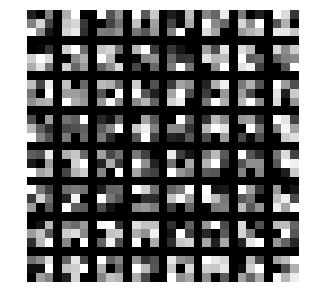

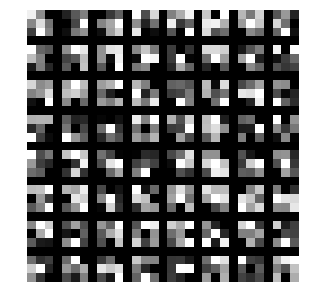

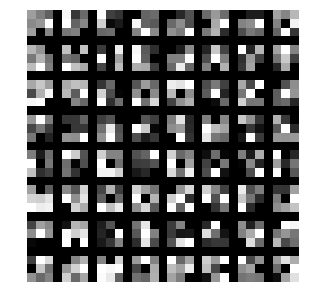

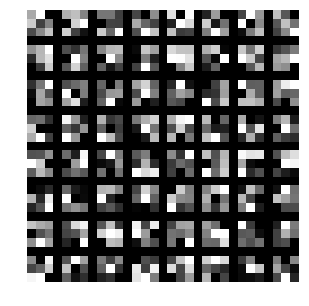

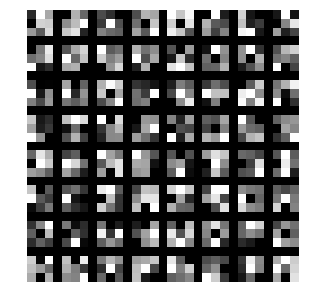

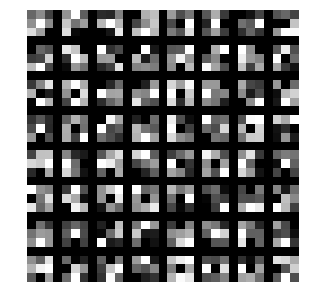

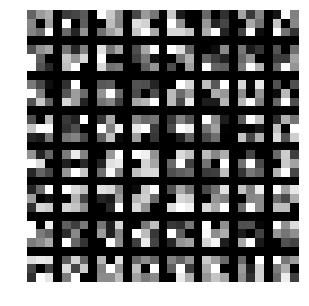

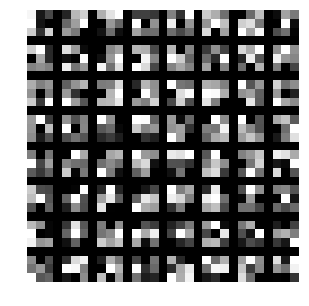

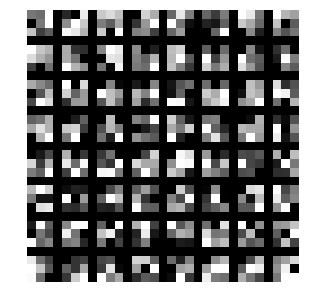

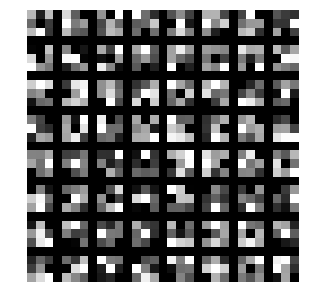

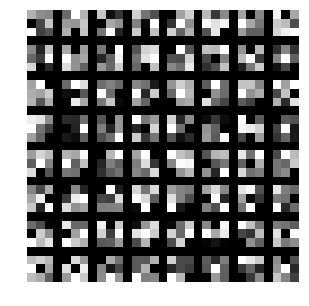

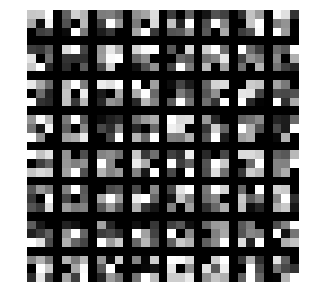

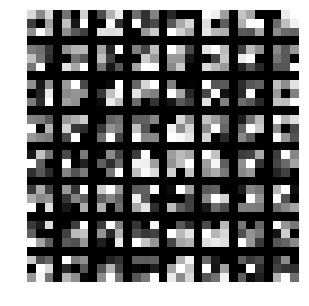

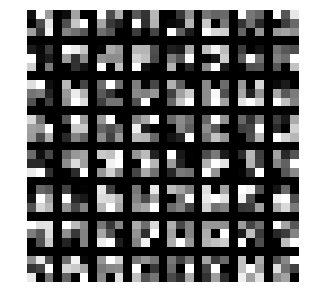

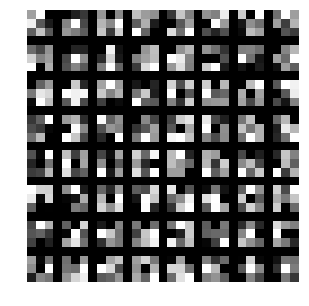

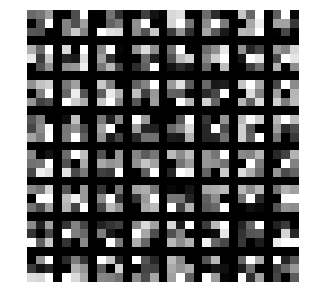

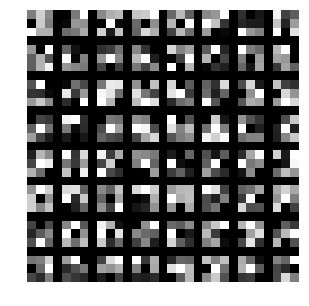

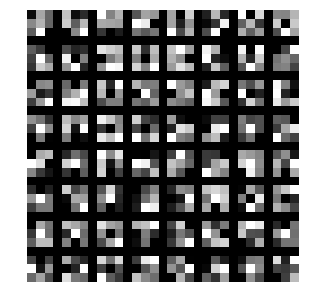

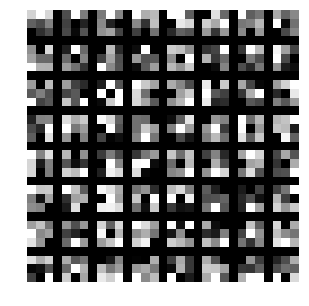

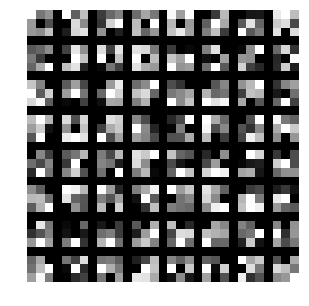

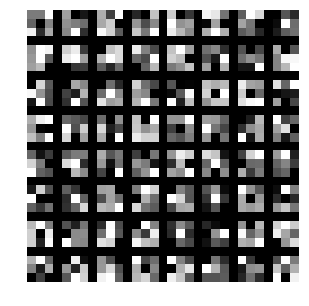

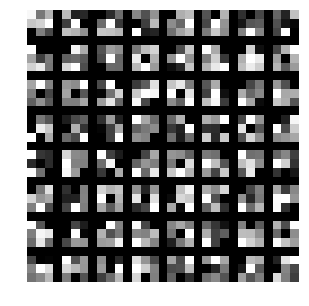

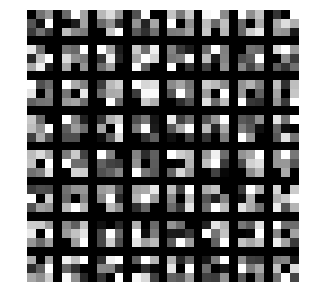

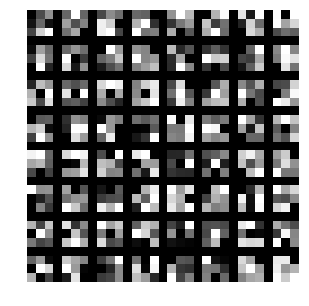

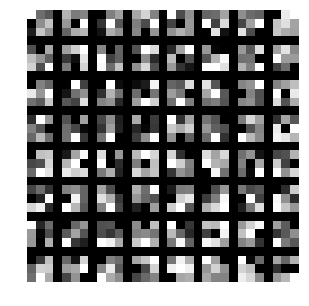

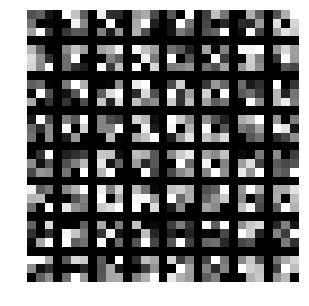

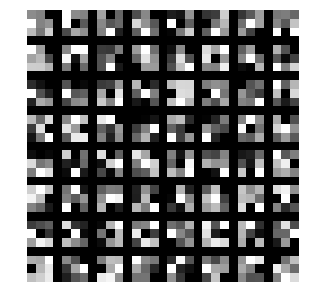

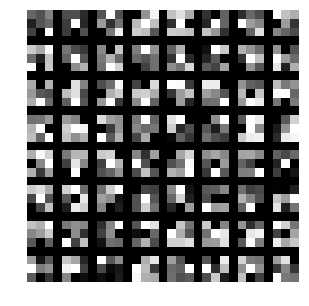

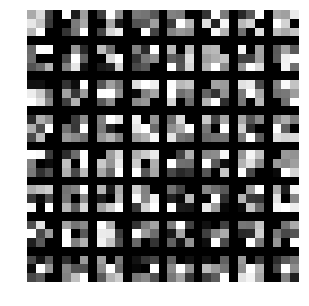

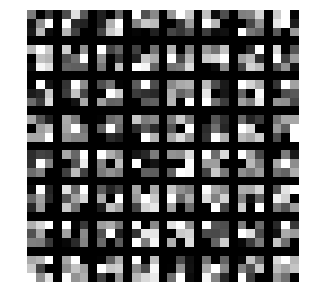

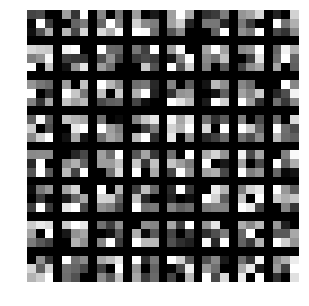

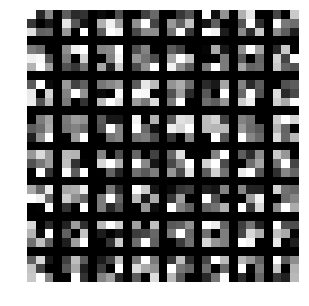

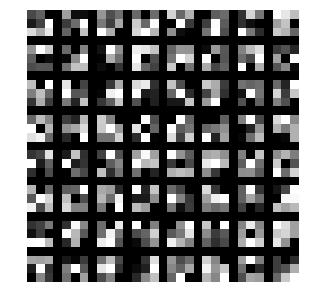

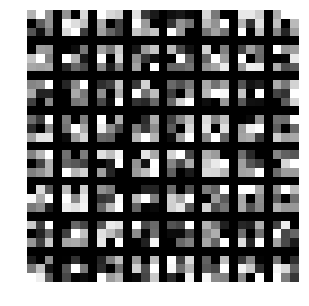

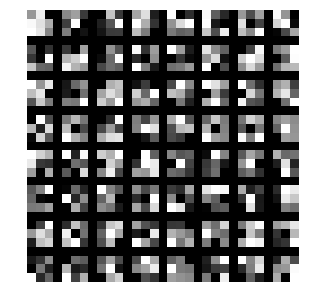

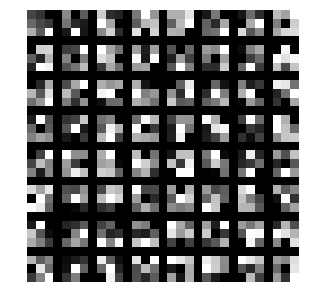

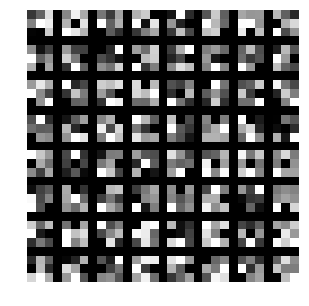

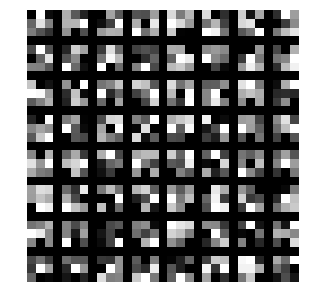

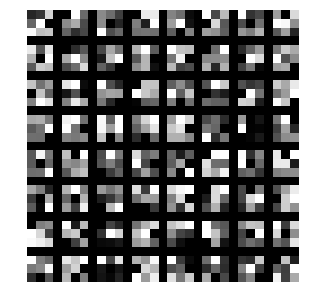

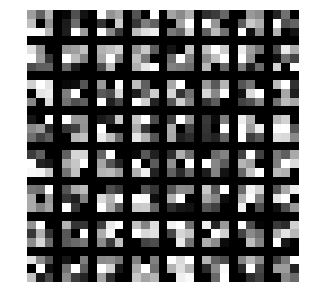

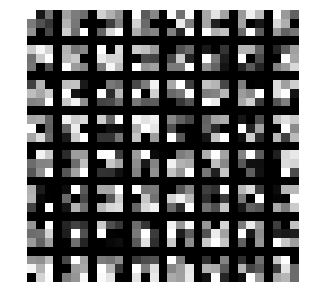

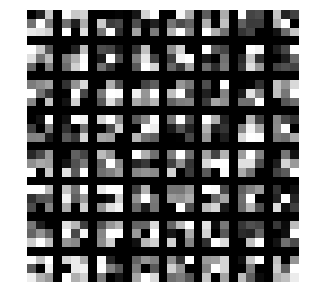

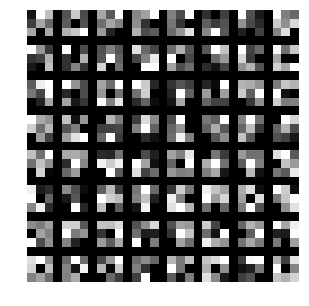

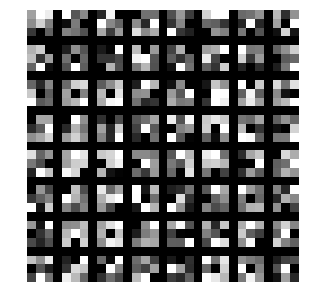

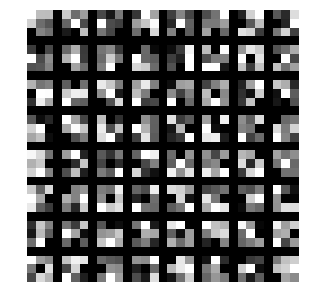

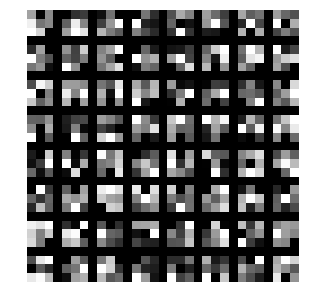

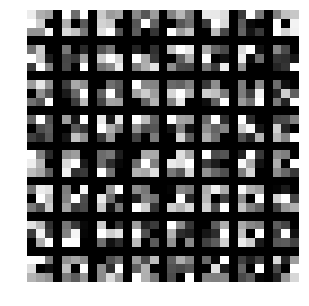

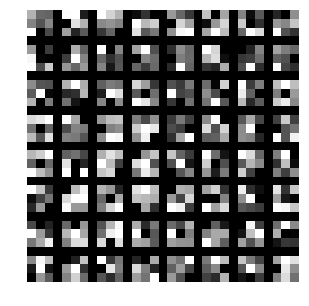

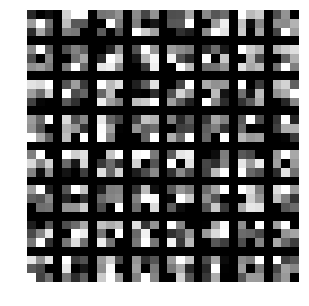

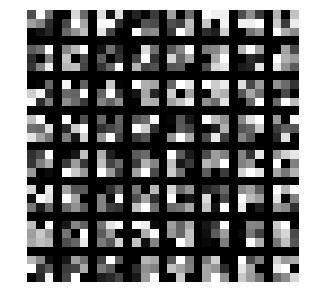

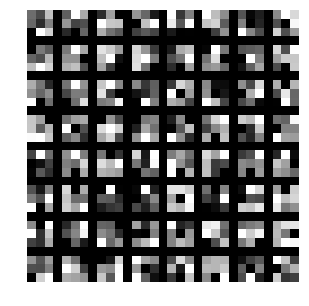

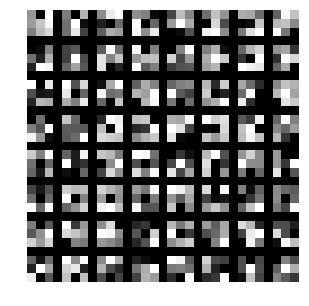

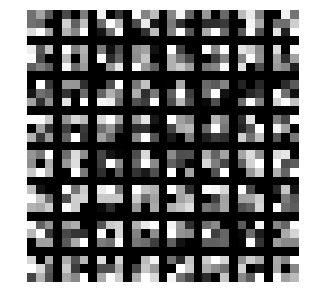

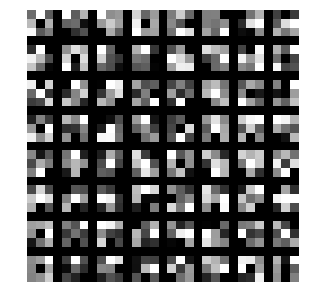

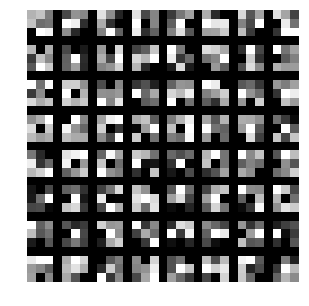

In [31]:
layer_index = 162 # 142 # 12 #2
n64s1_c1_0_weights = load_params[layer_index]
print(n64s1_c1_0_weights.shape)


for channel in range(n64s1_c1_0_weights.shape[3]):
    # vis_grid = (N, H, W, C)

    filters = n64s1_c1_0_weights[:,:,:, channel]

    filters = filters.reshape((filters.shape[0], filters.shape[1], filters.shape[2], 1))
    #print(filters.shape)

    filters = filters.transpose(2, 0, 1, 3)
    
    #print(filters.shape)
    
    filters = visualize_grid(filters)
    plt.imshow(np.squeeze(filters), cmap='gray')

    plt.axis('off')
    plt.gcf().set_size_inches(5, 5)
    plt.show()

    #print("--", filters.shape)